### 1.Library import

In [1]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### 2.Data import

In [2]:
ratings =pd.read_csv('../datasets/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
movies =pd.read_csv('../datasets/movies_small.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# ratings, movies를 merge

df=pd.merge(ratings, movies, on='movieId', how='inner')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [15]:
matrix = df.pivot_table(
    index='userId',
    columns='title',
    values='rating'
).fillna(0)

matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


In [12]:
movie_user_rating = matrix.values.T
movie_user_rating.shape

(9719, 610)

# sklearn.decomposition.TruncatedSVD
- class sklearn.decomposition.TruncatedSVD(n_components=2, *, algorithm='randomized', n_iter=5, n_oversamples=10, power_iteration_normalizer='auto', random_state=None, tol=0.0)

In [39]:
SVD = TruncatedSVD(n_components=12, n_iter=7, random_state=42)
svd_matrix = SVD.fit_transform(movie_user_rating)
svd_matrix

array([[ 5.55459719e-01,  8.08750648e-01, -3.70677048e-01, ...,
         2.89761115e-01, -4.92654369e-01,  6.33830103e-01],
       [ 2.34857543e-01,  4.86989738e-02,  2.82705232e-02, ...,
        -2.86642377e-02,  6.87487489e-02, -4.79599157e-04],
       [ 2.51207088e-01, -4.86098825e-03, -1.37691406e-02, ...,
         1.10689005e-02,  9.91670433e-02, -2.03428590e-02],
       ...,
       [ 9.35396233e-01,  9.31473575e-01, -1.29595566e-02, ...,
         5.60125607e-01, -6.09351161e-01,  1.20419577e+00],
       [ 6.50333276e+00, -2.71460267e+00, -2.10313247e+00, ...,
         2.33337244e+00,  1.00100807e+00, -3.92648324e+00],
       [ 3.13533586e-02, -4.36055661e-02,  3.29101637e-03, ...,
         1.66658466e-02,  4.94182330e-02,  2.28797489e-02]])

In [40]:
item_similarity=np.corrcoef(svd_matrix)
item_similarity

array([[ 1.        ,  0.2092475 ,  0.29277157, ...,  0.79535663,
        -0.11348598, -0.13673287],
       [ 0.2092475 ,  1.        ,  0.93729985, ...,  0.08287212,
         0.03933233, -0.21749126],
       [ 0.29277157,  0.93729985,  1.        , ...,  0.08170845,
         0.20300497,  0.03382902],
       ...,
       [ 0.79535663,  0.08287212,  0.08170845, ...,  1.        ,
        -0.09211366, -0.14298363],
       [-0.11348598,  0.03933233,  0.20300497, ..., -0.09211366,
         1.        ,  0.32384251],
       [-0.13673287, -0.21749126,  0.03382902, ..., -0.14298363,
         0.32384251,  1.        ]])

<Axes: >

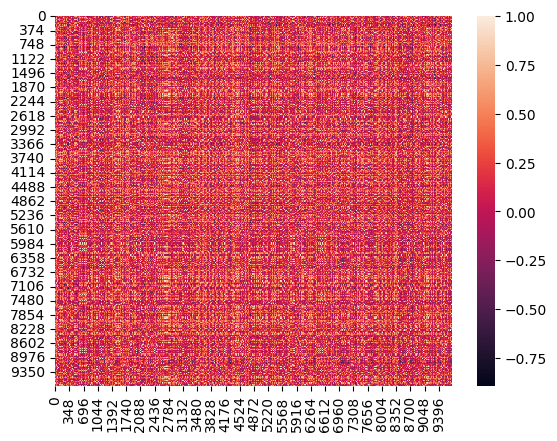

In [18]:
sns.heatmap(item_similarity)

In [41]:
movie_title=matrix.columns
movie_title_list=list(movie_title)

In [42]:
coffey_hands = movie_title_list.index("Guardians of the Galaxy (2014)")
coffey_hands

3667

In [43]:
corr_coffey_hand=item_similarity[coffey_hands]
list(movie_title[corr_coffey_hand>=0.9])[:10]

['Adjustment Bureau, The (2011)',
 'Amazing Spider-Man, The (2012)',
 'Ant-Man (2015)',
 'Avatar (2009)',
 'Avengers, The (2012)',
 'Avengers: Age of Ultron (2015)',
 'Big Hero 6 (2014)',
 'Brave (2012)',
 'Captain America: Civil War (2016)',
 'Captain America: The First Avenger (2011)']

In [44]:
item_similarity[coffey_hands]

array([ 0.4790324 ,  0.09670657,  0.13596476, ...,  0.31948757,
        0.28132989, -0.03376383])

#### 4.특정 사용자에게 추천하기

In [46]:
matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


In [48]:
matrix_1 = matrix.to_numpy()

In [50]:
matrix_1_mean = np.mean(matrix_1 , axis=1)

In [52]:
matrix_norm=matrix_1-matrix_1_mean.reshape(-1,1)
matrix_norm

array([[-0.10422883, -0.10422883, -0.10422883, ..., -0.10422883,
         3.89577117, -0.10422883],
       [-0.01178105, -0.01178105, -0.01178105, ..., -0.01178105,
        -0.01178105, -0.01178105],
       [-0.00977467, -0.00977467, -0.00977467, ..., -0.00977467,
        -0.00977467, -0.00977467],
       ...,
       [-0.26798024, -0.26798024, -0.26798024, ..., -0.26798024,
        -0.26798024, -0.26798024],
       [-0.01244984, -0.01244984, -0.01244984, ..., -0.01244984,
        -0.01244984, -0.01244984],
       [ 3.5058648 , -0.4941352 , -0.4941352 , ...,  1.0058648 ,
        -0.4941352 , -0.4941352 ]])

In [53]:
pd.DataFrame(matrix_norm, columns=matrix.columns)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,-0.104229,-0.104229,-0.104229,-0.104229,-0.104229,-0.104229,-0.104229,-0.104229,-0.104229,-0.104229,...,-0.104229,-0.104229,-0.104229,-0.104229,-0.104229,-0.104229,-0.104229,-0.104229,3.895771,-0.104229
1,-0.011781,-0.011781,-0.011781,-0.011781,-0.011781,-0.011781,-0.011781,-0.011781,-0.011781,-0.011781,...,-0.011781,-0.011781,-0.011781,-0.011781,-0.011781,-0.011781,-0.011781,-0.011781,-0.011781,-0.011781
2,-0.009775,-0.009775,-0.009775,-0.009775,-0.009775,-0.009775,-0.009775,-0.009775,-0.009775,-0.009775,...,-0.009775,-0.009775,-0.009775,-0.009775,-0.009775,-0.009775,-0.009775,-0.009775,-0.009775,-0.009775
3,-0.079020,-0.079020,-0.079020,-0.079020,-0.079020,-0.079020,-0.079020,-0.079020,-0.079020,-0.079020,...,-0.079020,-0.079020,-0.079020,-0.079020,-0.079020,-0.079020,-0.079020,-0.079020,-0.079020,-0.079020
4,-0.016463,-0.016463,-0.016463,-0.016463,-0.016463,-0.016463,-0.016463,-0.016463,-0.016463,-0.016463,...,-0.016463,-0.016463,-0.016463,-0.016463,-0.016463,-0.016463,-0.016463,-0.016463,-0.016463,-0.016463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,-0.419590,-0.419590,-0.419590,-0.419590,-0.419590,-0.419590,-0.419590,-0.419590,-0.419590,-0.419590,...,-0.419590,-0.419590,-0.419590,-0.419590,-0.419590,-0.419590,-0.419590,-0.419590,-0.419590,-0.419590
606,-0.072847,-0.072847,-0.072847,-0.072847,-0.072847,-0.072847,-0.072847,-0.072847,-0.072847,-0.072847,...,-0.072847,-0.072847,-0.072847,-0.072847,-0.072847,-0.072847,-0.072847,-0.072847,-0.072847,-0.072847
607,-0.267980,-0.267980,-0.267980,-0.267980,-0.267980,-0.267980,-0.267980,-0.267980,-0.267980,-0.267980,...,-0.267980,-0.267980,-0.267980,-0.267980,-0.267980,4.232020,3.232020,-0.267980,-0.267980,-0.267980
608,-0.012450,-0.012450,-0.012450,-0.012450,-0.012450,-0.012450,-0.012450,-0.012450,-0.012450,-0.012450,...,-0.012450,-0.012450,-0.012450,-0.012450,-0.012450,-0.012450,-0.012450,-0.012450,-0.012450,-0.012450


In [54]:
U,sigma,Vt = svds(matrix_norm, k= 12)

In [55]:
U.shape

(610, 12)

In [56]:
sigma.shape

(12,)

In [58]:
Vt.shape

(12, 9719)

In [59]:
sigma=np.diag(sigma)

In [63]:
svd_user_predict_rating = np.dot(np.dot(U, sigma), Vt) + matrix_1_mean.reshape(-1,1) 

In [67]:
df_svd_user_predict=pd.DataFrame(svd_user_predict_rating, columns= matrix.columns )

In [68]:
df_svd_user_predict.shape

(610, 9719)